<a href="https://colab.research.google.com/github/napoles-uach/max_distance/blob/main/Snowman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

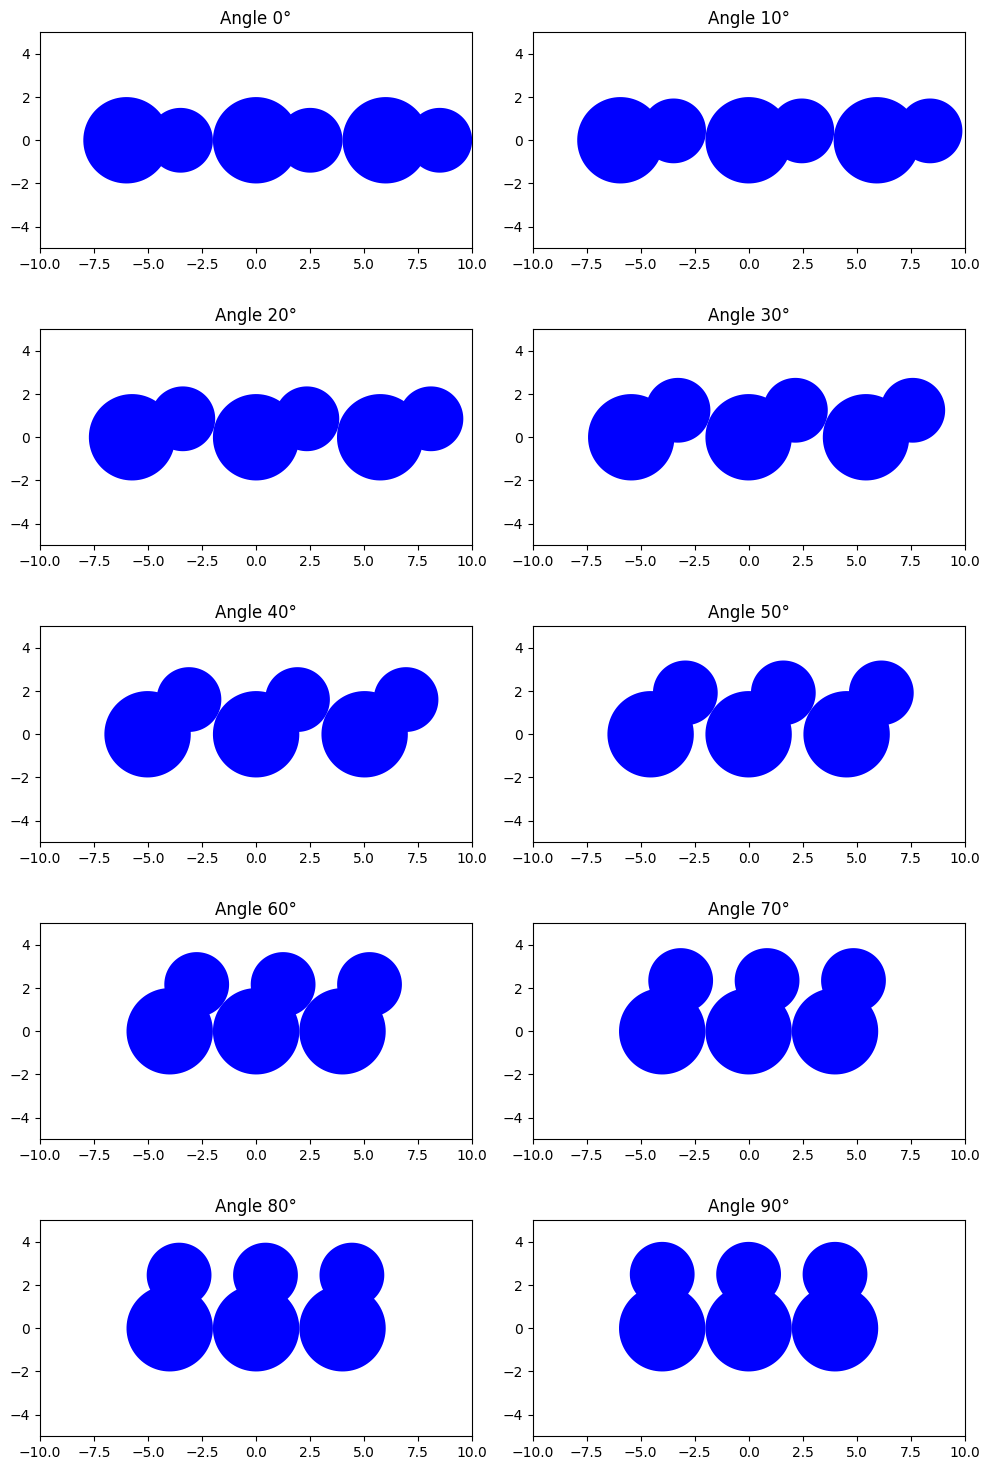

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def max_distance(x1, y1, r1, x2, y2, r2):
    """Calcula la altura y donde la distancia horizontal entre los círculos es máxima."""
    a = r2**2 - r1**2
    b = -2 * y1 * r2**2 + 2 * y2 * r1**2
    c = y1**2 * r2**2 - y2**2 * r1**2
    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return None, None

    y1_solution = (-b + np.sqrt(discriminant)) / (2 * a)
    y2_solution = (-b - np.sqrt(discriminant)) / (2 * a)
    return (y1_solution, y2_solution)

def xs(h, a, b, r):
    """Devuelve las coordenadas x para un círculo dado un y."""
    delta = r**2 - (h - b)**2
    if delta < 0:
        return None, None
    sqrt_delta = np.sqrt(delta)
    xp = sqrt_delta + a
    xm = -sqrt_delta + a
    return xp, xm

def plot_circles(ax, x1, y1, r1, x2, y2, r2, y_max_distance, d, xmin):
    """Grafica los círculos y sus imágenes a la derecha e izquierda en un subplot."""
    theta = np.linspace(0, 2 * np.pi, 100)
    x1_circle = r1 * np.cos(theta) + x1
    y1_circle = r1 * np.sin(theta) + y1
    x2_circle = r2 * np.cos(theta) + x2
    y2_circle = r2 * np.sin(theta) + y2

    ax.fill(x1_circle, y1_circle, 'b', alpha=1.0)
    ax.fill(x2_circle, y2_circle, 'b', alpha=1.0)
    ax.fill(x1_circle + d, y1_circle, 'b', alpha=1.0)
    ax.fill(x2_circle + d, y2_circle, 'b', alpha=1.0)
    ax.fill(x1_circle - d, y1_circle, 'b', alpha=1.0)
    ax.fill(x2_circle - d, y2_circle, 'b', alpha=1.0)
    #ax.plot([xmin, xmin+d], [y_max_distance, y_max_distance], color='red', linestyle='-', linewidth=2)

    ax.set_xlim([-10, 10])
    ax.set_ylim([-5, 5])
    ax.set_aspect('equal')
    #ax.grid(True)

# Datos iniciales
x1, y1, r1 = 0, 0, 2
rc = 2.5

fig, axes = plt.subplots(5, 2, figsize=(10, 15))  # Grid of 3x4 for 12 plots
axes = axes.flatten()  # Flatten the array to make indexing easier

for index, angle in enumerate(range(0, 91, 10)):
    theta = angle * np.pi / 180
    x2, y2, r2 = rc * np.cos(theta), rc * np.sin(theta), 1.5
    ym1, ym2 = max_distance(x1, y1, r1, x2, y2, r2)
    values = []

    if ym1 is not None and ym2 is not None:
        for y in [ym1, ym2]:
            xp1, xm1 = xs(y, x1, y1, r1)
            xp2, xm2 = xs(y, x2, y2, r2)
            if xp1 is not None and xm1 is not None:
                values.extend([xp1, xm1])
            if xp2 is not None and xm2 is not None:
                values.extend([xp2, xm2])

        # Calcular la diferencia entre el máximo y el mínimo
        values_array = np.array(values)
        difference = values_array.max() - values_array.min()
        difference = max(2 * r1, difference)  # Asegura que no haya traslape
        xmin = values_array.min()

        # Graficar en el subplot correspondiente
        ax = axes[index]
        plot_circles(ax, x1, y1, r1, x2, y2, r2, ym1, difference, xmin)
        ax.set_title(f"Angle {angle}°")
    else:
        print(f"No valid y-values found for maximum distance at angle {angle} degrees.")

plt.tight_layout()
plt.show()